<a href="https://colab.research.google.com/github/frankthairu/Autolib-Research-IP-4/blob/main/Copy_of_Autolib_Research_IP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Autolib' was an electric car sharing service which was inaugurated in Paris, France, in December 2011. It closed on 31 July 2018. It was operated by the Bolloré industry and complemented the city's bike sharing system, Velib', which was set up in 2007. The Autolib' service maintained a fleet of all-electric cars which included the Blue cars, the utilib cars and utilib 14 cars for public use on a paid subscription basis, employing a citywide network of parking and charging stations.




1.   Specyfying the Data Analytic 
Question

The main aim of our research is to find out if the number of Blue cars taken from area of postal code 75015 is greater than that of postal code 75017. This will also form the basis of our null hypothesis. 


2. Defining the Metric for Success

In order to perform a successful analysis we first need to perform univariate analysis which will help us understand more about the important variables individually. This way, when we perform other analysis, we will be able to understand better. We we also be doing bivariate analysis which will be followed by a hypothesis testing.

We will finally conclude with the results and interpretation of our test.

3. Understanding the context

The Dataset we will be using is an autollib dataset, which involves different sets of cars i.e Blue cars, the utilib cars and utilib 14 cars that were used in the France region. The dataset contains information from different areas with different postal code.

4. Recording the Experimental Design Below are the steps i took to implement this solution

a) Business Understanding: This sheds light to the context of the business question that we are trying to answer hence keep the focus during the data analysis so that we meet the intended objective.

b) Reading the data: Reading our data with and aim to understand the variables and observations.

c) Checking our data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others.

d) Data cleaning, I performed all my data cleaning and preparation to make my data ready for analysis. The dataset we will be using is in the link below



e) EDA, the data was analysed and visualized.

f) Implementing the solution using Linear discriminant analaysis and CPA

g) Challenged the solution.

h)Conclusion


5. Data Relevance 

The data we have was from three years ago. This is because the program was closed. Nonrtheless,for our anaysis, the data doesnt need to be up to date since all we are interested in doing is to answer a simple question.













# Importing our libraries

In [62]:
#We import all the libraries we will neeed
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
import pylab
from scipy import stats
from statsmodels.stats import weightstats as stests
%matplotlib inline


# Reading our data

In [64]:
#We read our data
#
df=pd.read_csv("/content/autolib_daily_events_postal_code.csv")
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [65]:
#we check the first records in our dataset
#
df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [66]:
#We check the last records in our dataset
#
df.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


# Data cleaning

In [5]:
#inspecting the data
#finding the statistical summaries in our data
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [6]:
#inspecting the data
#checking types contained in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [7]:
#inspecting our data
#checking for null values in our dataset
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

We see there is no null values in either of our columns so we leave it at that

In [8]:
#inspecting our data
#we check for the no of duplicates
df.duplicated().sum()


0

In [9]:
#inspecting our data
#inspecting column names
df.columns


Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

By doing this we see which names have mistakes then appropriately correct them

In [10]:
#cleaning our data
#changing row names to ensuere uniformity
df.rename(columns={'Postal code':'Postal_code',
                   'n_daily_data_points':'N_daily_data_points',
                   'dayOfWeek':'Day_of_week',
                   'day_type':'Day_type'},
          inplace=True, errors='raise')

In [11]:
#cleaning our data
# Change Date column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [12]:
#We replace the numbered days with the actual names of the days
#
df['Day_of_week'] = df['Day_of_week'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [13]:
df.head(10)

,Postal_code,date,N_daily_data_points,Day_of_week,Day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,Monday,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,Tuesday,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,Wednesday,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,Thursday,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,Friday,weekday,114,117,3,3,6,6,18,20
5,75001,2018-01-06,1437,Saturday,weekend,187,185,6,6,7,8,38,35
6,75001,2018-01-07,1440,Sunday,weekend,180,180,2,2,10,9,34,34
7,75001,2018-01-08,1438,Monday,weekday,84,83,3,3,10,10,14,15
8,75001,2018-01-09,1439,Tuesday,weekday,81,84,1,1,4,4,15,15
9,75001,2018-01-10,1440,Wednesday,weekday,88,85,5,5,11,11,23,22


In [67]:
#inspecting our dataset
# Checking for Anomalies in Bluecars

q1_taken = df['BlueCars_taken_sum'].quantile(.25)
q3_taken = df['BlueCars_taken_sum'].quantile(.75)

iqr_taken = q3_taken - q1_taken

# 'blue cars returned' variable
q1_returned = df['BlueCars_returned_sum'].quantile(.25)
q3_returned = df['BlueCars_returned_sum'].quantile(.75)

iqr_returned = q3_returned - q1_returned


print(iqr_taken, iqr_returned)

115.0 115.0


The results show that the blue cars taken and blue cars returned attributes have 115 records that are not within the middle 50% of the records in those columns.


In [70]:
#inspecting our dataset
# Checking for Anomalies in utilib cars

q1_taken = df['Utilib_taken_sum'].quantile(.25)
q3_taken = df['Utilib_taken_sum'].quantile(.75)

iqr_taken = q3_taken - q1_taken

# 'blue cars returned' variable
q1_returned = df['Utilib_returned_sum'].quantile(.25)
q3_returned = df['Utilib_returned_sum'].quantile(.75)

iqr_returned = q3_returned - q1_returned


print(iqr_taken, iqr_returned)

4.0 4.0


The results show that the utilb cars taken and utilib cars returned attributes have 4 records that are not within the middle 50% of the records in those columns.


In [69]:
#inspecting our dataset
#checking for anomalies in utilib 14 cars
q1_taken = df['Utilib_14_taken_sum'].quantile(.25)
q3_taken = df['Utilib_14_taken_sum'].quantile(.75)

iqr_taken = q3_taken - q1_taken

# 'blue cars returned' variable
q1_returned = df['Utilib_14_returned_sum'].quantile(.25)
q3_returned = df['Utilib_14_returned_sum'].quantile(.75)

iqr_returned = q3_returned - q1_returned


print(iqr_taken, iqr_returned)

9.0 9.0


The results show that the utilib 14 cars taken and utilib 14 cars returned attributes have 9 records that are not within the middle 50% of the records in those columns.


# Exporting our cleaned Dataset

In [18]:
#We export our cleaned dataset into a csv file
#
df.to_csv('New_autolib.csv',index=False, header=True)

In [19]:
#reading our new dataset and viewing the first 5 rows
#
df=pd.read_csv("New_autolib.csv")
df.tail(10)

,Postal_code,date,N_daily_data_points,Day_of_week,Day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,2018-06-10,1440,Sunday,weekend,34,32,0,0,1,0,0,0
16076,95880,2018-06-11,1440,Monday,weekday,17,18,0,0,0,0,0,0
16077,95880,2018-06-12,1439,Tuesday,weekday,25,25,0,0,0,0,0,0
16078,95880,2018-06-13,1440,Wednesday,weekday,12,13,0,0,1,1,0,0
16079,95880,2018-06-14,1439,Thursday,weekday,15,13,0,0,0,0,0,0
16080,95880,2018-06-15,1440,Friday,weekday,15,10,0,0,2,3,0,0
16081,95880,2018-06-16,1440,Saturday,weekend,19,19,0,0,2,1,0,0
16082,95880,2018-06-17,1440,Sunday,weekend,33,35,1,1,0,0,0,0
16083,95880,2018-06-18,1440,Monday,weekday,11,14,3,5,2,2,0,0
16084,95880,2018-06-19,1370,Tuesday,weekday,2,2,2,1,0,0,0,0


# Exploratory Analysis : Univariate Analysis

In [20]:
#Getting the numeric features description of new dataset
#
df.describe()

,Postal_code,N_daily_data_points,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


Monday       2374
Tuesday      2363
Sunday       2274
Friday       2271
Wednesday    2268
Thursday     2268
Saturday     2267
Name: Day_of_week, dtype: int64

******************************


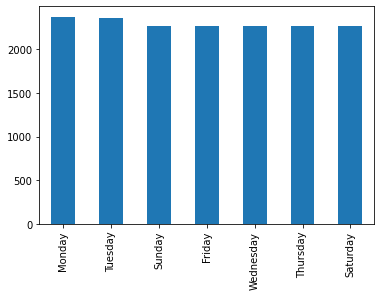

In [21]:
# we check how often each day appears
#
print(df.Day_of_week.value_counts())
print("")
print("******************************")

df.Day_of_week.value_counts().plot(kind= 'bar');

weekday    11544
weekend     4541
Name: Day_type, dtype: int64

******************************


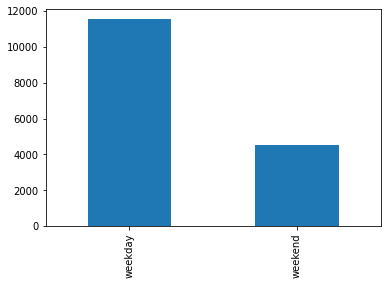

In [22]:
# we check how often each day type appears
#
print(df.Day_type.value_counts())
print("")
print("******************************")

df.Day_type.value_counts().plot(kind= 'bar');

# Univariate Analysis for area postal code 75015

In [40]:
#Creating a subset of area 75015
#
paris_15=df[df['Postal_code']==75015]
paris_15

,Postal_code,date,N_daily_data_points,Day_of_week,Day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2184,75015,2018-01-01,1440,Monday,weekday,781,843,16,21,65,68,202,215
2185,75015,2018-01-02,1438,Tuesday,weekday,710,720,21,20,50,49,191,193
2186,75015,2018-01-03,1439,Wednesday,weekday,739,752,31,30,65,67,194,201
2187,75015,2018-01-04,1320,Thursday,weekday,669,644,15,15,61,58,165,158
2188,75015,2018-01-05,1440,Friday,weekday,852,846,21,18,70,71,196,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,75015,2018-06-15,1440,Friday,weekday,1093,1056,30,30,58,54,288,294
2336,75015,2018-06-16,1440,Saturday,weekend,1209,1154,36,33,49,47,310,290
2337,75015,2018-06-17,1440,Sunday,weekend,1001,1090,35,41,44,50,225,244
2338,75015,2018-06-18,1440,Monday,weekday,669,698,26,22,59,58,183,183


Monday       23
Tuesday      23
Sunday       22
Thursday     22
Friday       22
Saturday     22
Wednesday    22
Name: Day_of_week, dtype: int64

******************************


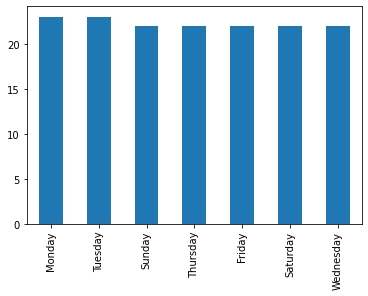

In [41]:
# we check how often each day appears
#
print(paris_15.Day_of_week.value_counts())
print("")
print("******************************")

paris_15.Day_of_week.value_counts().plot(kind= 'bar');

weekday    112
weekend     44
Name: Day_type, dtype: int64

******************************


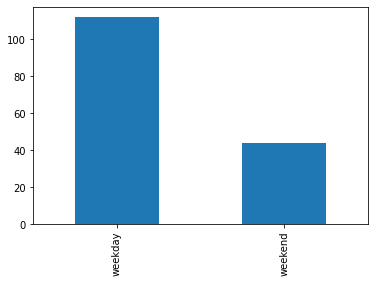

In [42]:
# we check how often each day type appears
#
print(paris_15.Day_type.value_counts())
print("")
print("******************************")

paris_15.Day_type.value_counts().plot(kind= 'bar');

In [43]:
# We check the central tendancies of blue cars taken in our paris_15 dataframe
#
skew_15 = paris_15['BlueCars_taken_sum'].skew()
kurt_15 = paris_15['BlueCars_taken_sum'].kurt()
mode_15 = paris_15['BlueCars_taken_sum'].mode()

print(skew_15)
print("")
print("******************************")
print(kurt_15)
print("")
print("******************************")
print(mode_15)
print("")
print("******************************")


-0.5637380099563069

******************************
4.091250013545727

******************************
0    723
1    810
dtype: int64

******************************


In [44]:
# We check the central tendancies of blue cars returned in our paris_15 dataframe
#
skew_15 = paris_15['BlueCars_returned_sum'].skew()
kurt_15 = paris_15['BlueCars_returned_sum'].kurt()
mode_15 = paris_15['BlueCars_returned_sum'].mode()


print(skew_15)
print("")
print("******************************")
print(kurt_15)
print("")
print("******************************")
print(mode_15)
print("")
print("******************************")

-0.5859154840901382

******************************
3.7020335626168808

******************************
0    770
1    791
2    877
3    979
dtype: int64

******************************


In [45]:
#we find statistical analysis of new dataset
#
paris_15.describe()

,Postal_code,N_daily_data_points,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,75015.0,1431.288462,896.955128,897.070513,24.346154,24.346154,61.621795,61.615385,238.916667,239.089744
std,0.0,33.310661,189.507625,187.025929,8.130908,8.407104,15.539063,15.655757,49.760712,49.075895
min,75015.0,1174.000000,49.000000,52.000000,1.000000,1.000000,2.000000,5.000000,7.000000,8.000000
25%,75015.0,1439.000000,781.000000,788.250000,19.000000,20.000000,52.000000,51.000000,208.000000,209.000000
50%,75015.0,1440.000000,878.500000,868.000000,24.000000,24.000000,61.500000,62.000000,235.000000,235.500000
75%,75015.0,1440.000000,1001.250000,1015.500000,29.000000,29.000000,71.250000,71.000000,273.250000,271.000000
max,75015.0,1440.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


This is a simplified summaries of our statistical analysis of the Paris_dataset

# Univariate Analysis of Postal code 75017

In [46]:
#Creating a subset of area 75015
#
paris_17=df[df['Postal_code']==75017]
paris_17

,Postal_code,date,N_daily_data_points,Day_of_week,Day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2496,75017,2018-01-01,1440,Monday,weekday,634,671,16,15,63,67,159,171
2497,75017,2018-01-02,1438,Tuesday,weekday,548,542,13,15,40,33,125,126
2498,75017,2018-01-03,1439,Wednesday,weekday,638,616,15,13,27,26,153,144
2499,75017,2018-01-04,1320,Thursday,weekday,553,534,16,17,30,30,141,145
2500,75017,2018-01-05,1440,Friday,weekday,705,703,12,13,40,42,179,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,75017,2018-06-15,1440,Friday,weekday,766,753,23,21,54,53,192,189
2648,75017,2018-06-16,1440,Saturday,weekend,859,891,19,21,31,31,222,231
2649,75017,2018-06-17,1440,Sunday,weekend,729,775,21,20,43,50,163,166
2650,75017,2018-06-18,1440,Monday,weekday,650,639,15,15,36,30,179,177


Monday       23
Tuesday      23
Sunday       22
Thursday     22
Friday       22
Saturday     22
Wednesday    22
Name: Day_of_week, dtype: int64

******************************


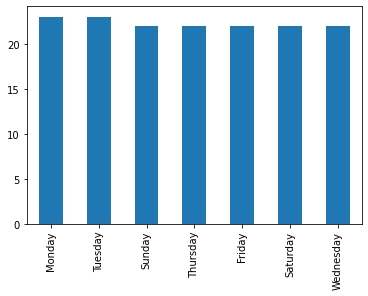

In [47]:
# we check how often each day appears
#
print(paris_17.Day_of_week.value_counts())
print("")
print("******************************")

paris_17.Day_of_week.value_counts().plot(kind= 'bar');

weekday    112
weekend     44
Name: Day_type, dtype: int64

******************************


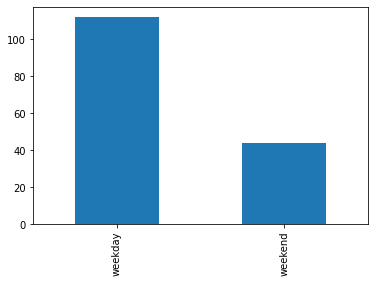

In [48]:
# we check how often each day type appears
#
print(paris_17.Day_type.value_counts())
print("")
print("******************************")

paris_17.Day_type.value_counts().plot(kind= 'bar');

In [49]:
# We check the central tendancies of blue cars taken in our paris_17 dataframe
#
skew_17 = paris_17['BlueCars_taken_sum'].skew()
kurt_17 = paris_17['BlueCars_taken_sum'].kurt()
mode_17 = paris_17['BlueCars_taken_sum'].mode()

print(skew_17)
print("")
print("******************************")
print(kurt_17)
print("")
print("******************************")
print(mode_17)
print("")
print("******************************")


-1.7252147959215833

******************************
10.370398071752177

******************************
0    740
dtype: int64

******************************


In [50]:
# We check the central tendancies of blue cars returned in our paris_15 dataframe
#
skew_17 = paris_17['BlueCars_returned_sum'].skew()
kurt_17 = paris_17['BlueCars_returned_sum'].kurt()
mode_17 = paris_17['BlueCars_returned_sum'].mode()


print(skew_17)
print("")
print("******************************")
print(kurt_17)
print("")
print("******************************")
print(mode_17)
print("")
print("******************************")

-1.3035115861911126

******************************
7.371236673123292

******************************
0    605
1    662
2    720
3    963
dtype: int64

******************************


In [51]:
#we find statistical analysis of new dataset
#
paris_17.describe()

,Postal_code,N_daily_data_points,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,75017.0,1431.288462,734.493590,734.237179,20.858974,20.865385,45.916667,45.878205,193.532051,193.480769
std,0.0,33.310661,126.229821,134.335118,6.989807,6.971913,12.310477,12.741774,37.143214,38.378669
min,75017.0,1174.000000,38.000000,41.000000,0.000000,2.000000,0.000000,1.000000,5.000000,5.000000
25%,75017.0,1439.000000,685.250000,666.000000,16.000000,16.000000,37.000000,37.000000,178.000000,174.000000
50%,75017.0,1440.000000,724.000000,717.000000,20.000000,20.000000,46.000000,45.500000,194.000000,192.500000
75%,75017.0,1440.000000,786.000000,801.750000,25.000000,24.250000,53.250000,54.000000,216.000000,213.000000
max,75017.0,1440.000000,992.000000,987.000000,38.000000,41.000000,81.000000,83.000000,296.000000,304.000000


# Exploratory Analysis- Bivariate Analysis

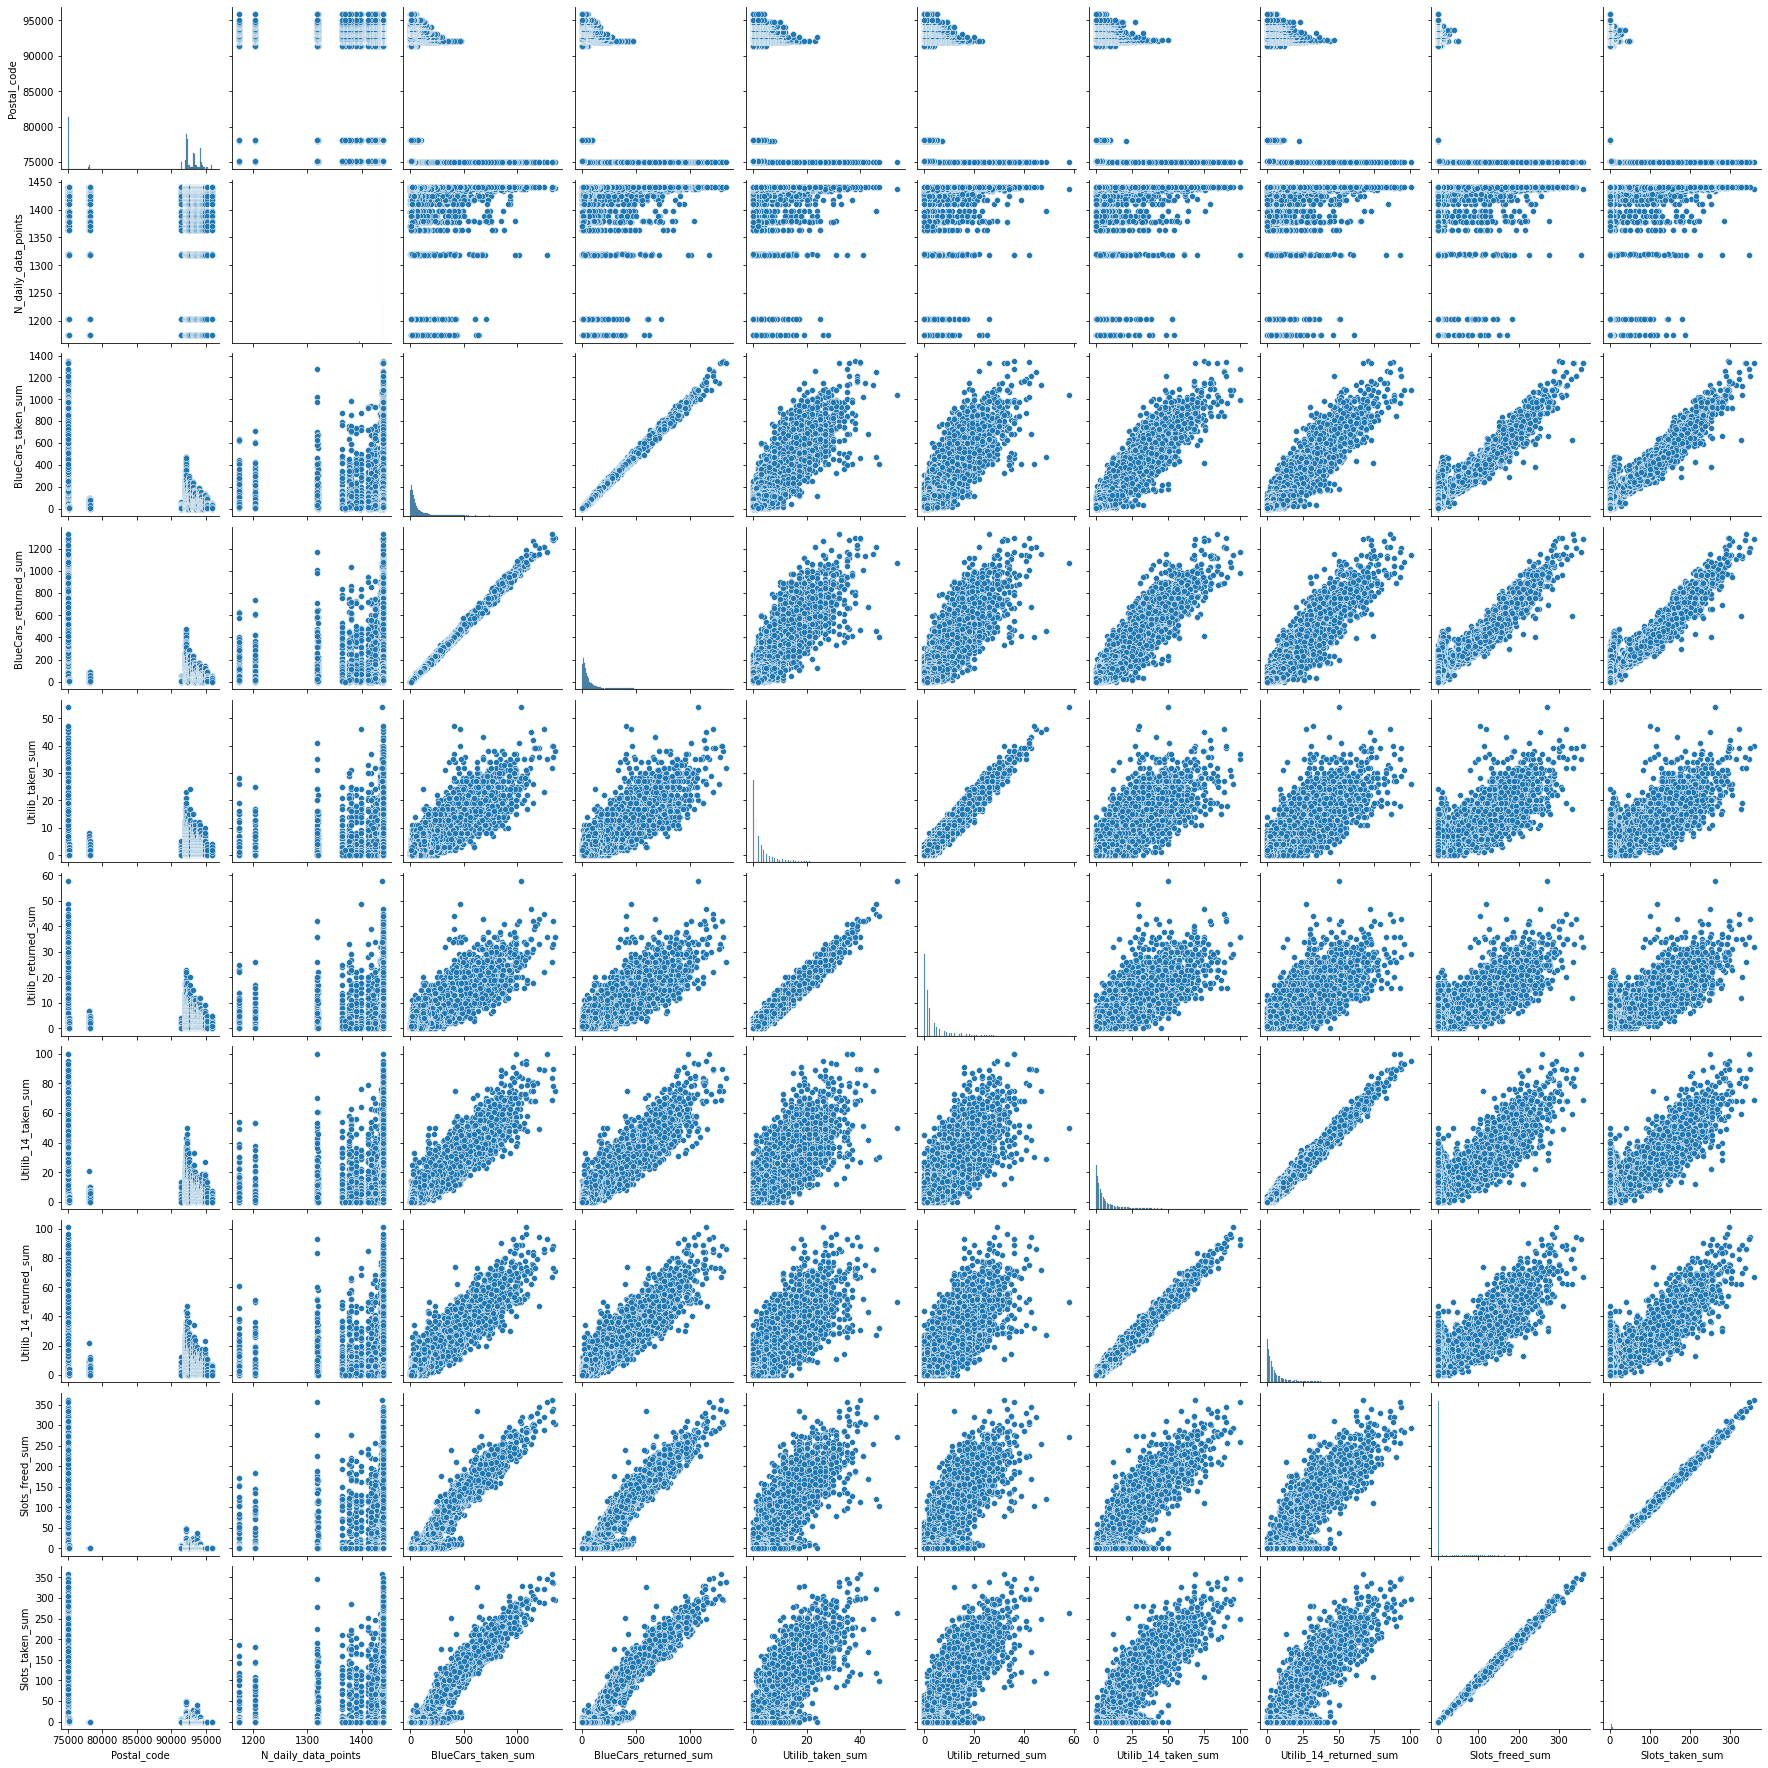

In [37]:
# Ploting the bivariate summaries and recording our observations
#
sns.pairplot(df)
plt.show()

In [38]:
#this is a summary analysis of the correlation coefficien
#
corr=df.corr()

corr.style.background_gradient(cmap='coolwarm')

,Postal_code,N_daily_data_points,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal_code,1.000000,0.000432,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
N_daily_data_points,0.000432,1.000000,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
BlueCars_taken_sum,-0.698020,0.029411,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221
Slots_taken_sum,-0.749157,0.021169,0.947996,0.948771,0.853049,0.852936,0.898719,0.899777,0.999221,1.000000


The correlation values from our correlation matrix table has all the types of correlation. When the value is 1 or the value is greater than zero and as nearer to 1, then it shows positive correlation. If the value is less than zero and as closes to -1 then it shows a negative correlation. If the value is 0, then there is no correlation at all. 

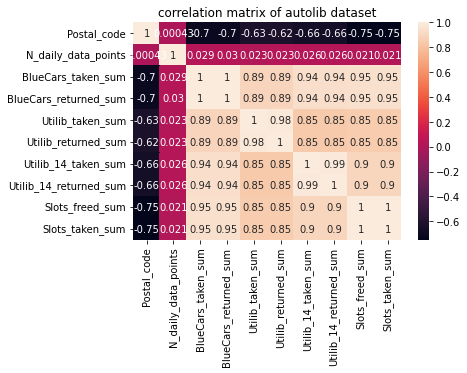

In [39]:
#we can also show the correlation in our dataset using a heatmap as follow
#
heatmp = sns.heatmap(df.corr(), annot = True)

heatmp.set(title = "correlation matrix of autolib dataset")

plt.show()

# Bivariate Analysis of postal code 75015

Day_of_week
Friday       20606
Monday       17751
Saturday     25040
Sunday       22162
Thursday     18323
Tuesday      17860
Wednesday    18183
Name: BlueCars_taken_sum, dtype: int64

**************************


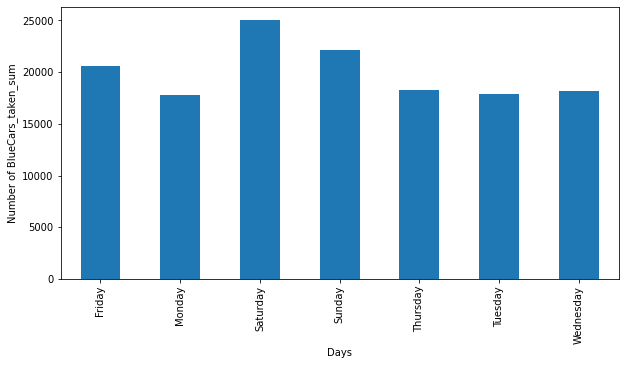

In [35]:
#we create a bar graph of total blue cars taken in accordance with the day of the week
#
print(paris_15.groupby('Day_of_week')['BlueCars_taken_sum'].sum())
print("")
print("**************************")
paris_15.groupby('Day_of_week')['BlueCars_taken_sum'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Days")
plt.ylabel("Number of BlueCars_taken_sum")
plt.show()



Day_type
weekday    92723
weekend    47202
Name: BlueCars_taken_sum, dtype: int64

**************************


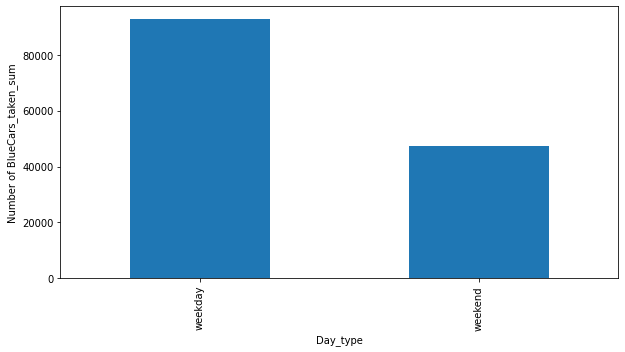

In [36]:
#we create a bar graph of total blue cars taken in accordance with the day type
#
print(paris_15.groupby('Day_type')['BlueCars_taken_sum'].sum())
print("")
print("**************************")
paris_15.groupby('Day_type')['BlueCars_taken_sum'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Day_type")
plt.ylabel("Number of BlueCars_taken_sum")
plt.show()

Day_of_week
Friday       20035
Monday       18082
Saturday     24391
Sunday       23316
Thursday     18235
Tuesday      17799
Wednesday    18085
Name: BlueCars_returned_sum, dtype: int64

***********************


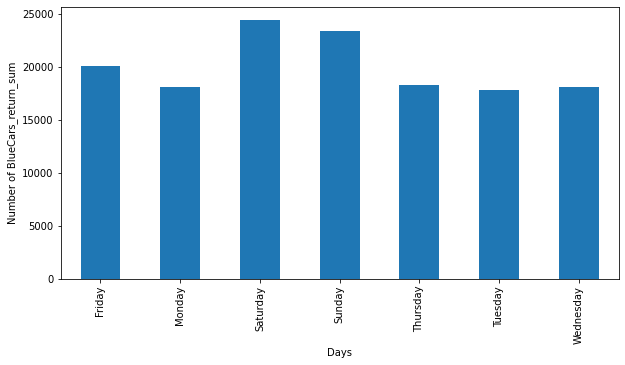

In [37]:
#we create a bar graph of total blue cars returned in accordance with the day of the week
#
print(paris_15.groupby('Day_of_week')['BlueCars_returned_sum'].sum())
print("")
print("***********************")
paris_15.groupby('Day_of_week')['BlueCars_returned_sum'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Days")
plt.ylabel("Number of BlueCars_return_sum")
plt.show()

Day_type
weekday    92236
weekend    47707
Name: BlueCars_returned_sum, dtype: int64

***************************


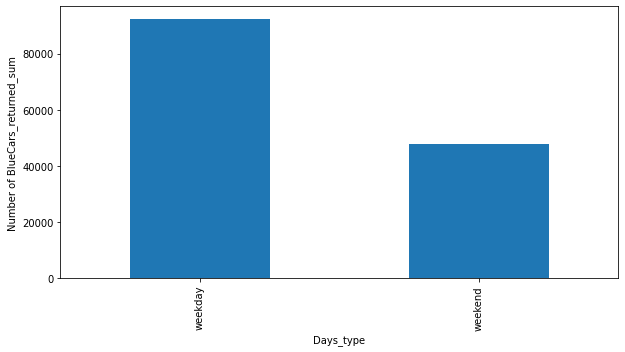

In [38]:
#we create a bar graph of total blue cars returned in accordance with the day type
#
print(paris_15.groupby('Day_type')['BlueCars_returned_sum'].sum())
print("")
print("***************************")
paris_15.groupby('Day_type')['BlueCars_returned_sum'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Days_type")
plt.ylabel("Number of BlueCars_returned_sum")
plt.show()

# Bivariate analysis of postal code 75017

Day_of_week
Friday       16565
Monday       15571
Saturday     19291
Sunday       17274
Thursday     15415
Tuesday      15423
Wednesday    15042
Name: BlueCars_taken_sum, dtype: int64

*********************


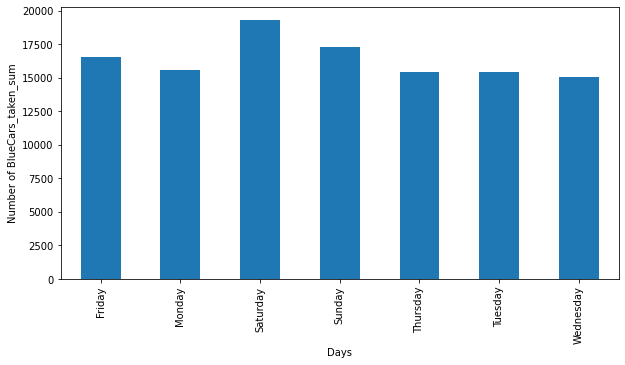

In [53]:
#we create a bar graph of total blue cars taken in accordance with the day of the week
#
print(paris_17.groupby('Day_of_week')['BlueCars_taken_sum'].sum())
print("")
print("*********************")
paris_17.groupby('Day_of_week')['BlueCars_taken_sum'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Days")
plt.ylabel("Number of BlueCars_taken_sum")
plt.show()

Day_type
weekday    78016
weekend    36565
Name: BlueCars_taken_sum, dtype: int64

************************


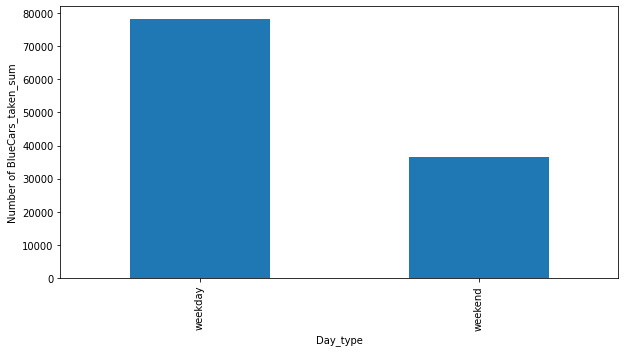

In [54]:
#we create a bar graph of total blue cars taken in accordance with the day type
#
print(paris_17.groupby('Day_type')['BlueCars_taken_sum'].sum())
print("")
print("************************")
paris_17.groupby('Day_type')['BlueCars_taken_sum'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Day_type")
plt.ylabel("Number of BlueCars_taken_sum")
plt.show()

Day_of_week
Friday       16514
Monday       15269
Saturday     19267
Sunday       18463
Thursday     15370
Tuesday      14868
Wednesday    14790
Name: BlueCars_returned_sum, dtype: int64

*******************


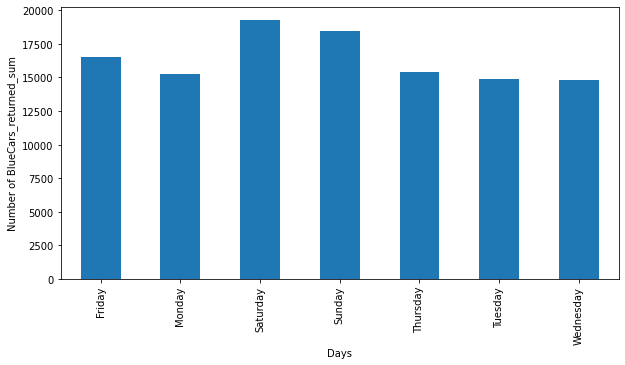

In [55]:
#we create a bar graph of total blue cars returned in accordance with the day of the week
#
print(paris_17.groupby('Day_of_week')['BlueCars_returned_sum'].sum())
print("")
print("*******************")
paris_17.groupby('Day_of_week')['BlueCars_returned_sum'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Days")
plt.ylabel("Number of BlueCars_returned_sum")
plt.show()

Day_type
weekday    76811
weekend    37730
Name: BlueCars_returned_sum, dtype: int64

*******************


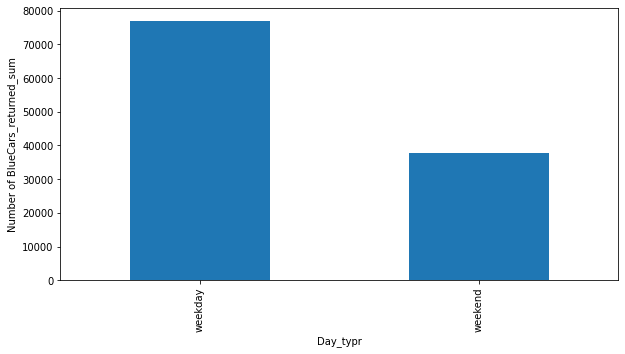

In [56]:
#we create a bar graph of total blue cars returned in accordance with the day type
#
print(paris_17.groupby('Day_type')['BlueCars_returned_sum'].sum())
print("")
print("*******************")
paris_17.groupby('Day_type')['BlueCars_returned_sum'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Day_typr")
plt.ylabel("Number of BlueCars_returned_sum")
plt.show()

# Conclusion of bivariate analysis
In our bivariate analysis, we chose to concentate more on the blue cars  since that was the centre of our research.

We also chose to concentrate more on the postal codes 75015 and 75017 sice that was we were mainly interested in

In conclusion we were able to come up with the following conclusions

For Postal code75015;

1. More cars were taken on weekdays compared to weekends.
2. More cars were returned on weekdays compared to weekdays.



For Postal code 76017;

1. More cars were returned on weekdays compared to weekends .
2. More cars were taken on weekdays compared ton weekends.

# Sampling and Hypothesis testing

# Sampling Approach

In our reasearch, since we are interested in carrying out the hypothesis between two different areas i.e postal code 75015 and 75017, we will use the stratified method. This is most efficient method since the postal codes will be our strata.

We we also only be using data from the blue cars only



# Hypothesis Testing

We will be using the z_test to carry out our Hypothesis testing since we are relating to a ample of grater than 30 i.e (n>30) In our case, we will be using a sample of 70.

Its also a convenient method since we know our standard deviations and mean.


A z-test is also useful when we want to determine whether two population means(in our case data from different postal codes)are different when the variances are known and the sample size is large.

In our z_test we will be looking at blue cars taken and comparing it with the two postal codes i.e codes 75015 and 75017.

Our argument is that more blue cars were taken in Postal code 75015 compared to 75017.

Thus , our null hypothesis will be that more blue cars were taken in Postal code 75015 compared to 75017.

If we obtain different results, we will have reject the null hypothesis and accept the alternative hypothesis.

The significant level that we will be using is 0.05.

The critical value for 0.05 is 1.645



# Obtaining samples

The first step will be to obtain samples

In [59]:

#we will be using the paris 15 and paris 17 sub datasets which we had 
#earlier on created


#we create a sample from our paris 15 dataset
#
sample_15=paris_15.sample(n=70)
sample_15




,Postal_code,date,N_daily_data_points,Day_of_week,Day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2210,75015,2018-01-27,1440,Saturday,weekend,1248,1214,46,45,89,86,319,321
2185,75015,2018-01-02,1438,Tuesday,weekday,710,720,21,20,50,49,191,193
2263,75015,2018-03-24,1440,Saturday,weekend,1186,1142,39,41,80,79,330,322
2284,75015,2018-04-14,1440,Saturday,weekend,1144,1133,42,42,79,75,302,299
2186,75015,2018-01-03,1439,Wednesday,weekday,739,752,31,30,65,67,194,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,75015,2018-01-20,1439,Saturday,weekend,1352,1300,38,36,75,71,302,295
2229,75015,2018-02-15,1437,Thursday,weekday,872,862,21,24,66,68,263,260
2265,75015,2018-03-26,1439,Monday,weekday,734,706,20,20,68,59,234,226
2211,75015,2018-01-28,1440,Sunday,weekend,1014,1049,25,26,71,76,277,272


In [60]:
#we get the statistical analysis of our ample
#
sample_15.describe()

,Postal_code,N_daily_data_points,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,75015.0,1430.728571,873.085714,877.042857,23.942857,24.028571,59.228571,59.457143,234.857143,235.457143
std,0.0,36.453234,174.167231,174.989808,8.055758,8.254944,14.905666,15.290127,47.512099,46.686958
min,75015.0,1174.000000,58.000000,93.000000,1.000000,4.000000,4.000000,5.000000,22.000000,24.000000
25%,75015.0,1439.000000,765.250000,778.500000,19.250000,20.000000,50.000000,49.250000,207.500000,209.000000
50%,75015.0,1440.000000,868.000000,850.000000,22.500000,23.000000,59.500000,59.000000,230.500000,232.000000
75%,75015.0,1440.000000,971.750000,977.250000,28.000000,28.000000,69.750000,70.750000,263.500000,261.000000
max,75015.0,1440.000000,1327.000000,1287.000000,54.000000,58.000000,94.000000,94.000000,360.000000,359.000000


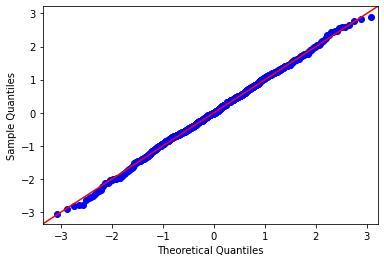

In [64]:
#we check for normality in our sample
#

sample_15 = norm.rvs(size=1000)
sm.qqplot(sample_15, line='45')
pylab.show()

We can see that our data has a normal distribution. This means that the quantiles of our variable are perfectly or somewhat perfectly inline with the "theoretical" normal quantiles.

In [60]:
#we create a sample from our paris 17 dataset
#
sample_17=paris_17.sample(n=70)
sample_17


,Postal_code,date,N_daily_data_points,Day_of_week,Day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2544,75017,2018-02-18,1438,Sunday,weekend,795,845,24,24,45,45,205,210
2622,75017,2018-05-21,1440,Monday,weekday,731,739,15,18,40,40,184,187
2611,75017,2018-04-29,1440,Sunday,weekend,654,662,13,15,46,48,174,170
2618,75017,2018-05-06,1439,Sunday,weekend,752,790,25,26,53,53,199,208
2498,75017,2018-01-03,1439,Wednesday,weekday,638,616,15,13,27,26,153,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,75017,2018-04-30,1440,Monday,weekday,741,770,20,20,40,36,200,207
2546,75017,2018-02-20,1425,Tuesday,weekday,625,605,19,20,35,35,160,153
2625,75017,2018-05-24,1436,Thursday,weekday,715,705,26,27,36,39,217,214
2503,75017,2018-01-08,1438,Monday,weekday,612,605,13,11,38,37,146,140


In [59]:
#we get the statistical analysis of our sample
#
sample_17.describe()

,Postal_code,N_daily_data_points,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,75017.0,1434.585714,748.685714,747.771429,20.742857,20.585714,45.900000,45.328571,198.614286,197.571429
std,0.0,17.981063,99.634629,115.483253,6.933819,6.675703,11.554722,11.722296,29.980812,31.778478
min,75017.0,1320.000000,553.000000,534.000000,9.000000,9.000000,23.000000,20.000000,141.000000,144.000000
25%,75017.0,1439.000000,687.000000,665.250000,15.250000,16.000000,36.250000,37.000000,179.000000,175.000000
50%,75017.0,1440.000000,729.500000,716.500000,19.000000,20.000000,46.000000,45.500000,196.000000,192.500000
75%,75017.0,1440.000000,807.500000,829.000000,25.000000,23.000000,53.750000,53.000000,220.250000,221.500000
max,75017.0,1440.000000,992.000000,987.000000,37.000000,41.000000,74.000000,71.000000,296.000000,304.000000


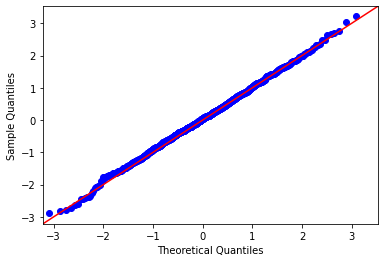

In [67]:
#we check for normality in our sample
#

sample_17 = norm.rvs(size=1000)
sm.qqplot(sample_17, line='45')
pylab.show()

We can see that our data has a normal distribution. This means that the quantiles of our variable are perfectly or somewhat perfectly inline with the "theoretical" normal quantiles.

In [57]:
# Next, we calculate the z-score and p value
#

ztest ,pval1 = stests.ztest(x1=sample_15['BlueCars_taken_sum'], x2=sample_17['BlueCars_taken_sum'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

2.1358075429808354e-07
Reject Null Hypothesis


From our test we can see that our p value is less than 0.05 hence we reject the null hypothesis

In [72]:
#checking the power of our test
#
from statsmodels.stats.power import TTestPower
  
  
power = TTestPower()
n_test = power.solve_power(nobs=40, effect_size = 0.5,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 0.869


From our power tesr, we csn see that it is 86% which is closer to 90% .This shows us that our test was conducted well and accurately.

# Hypothesis Testing Results and Interpratation.

After performing our hypothesis testing using the z test meyhod, we found out that we have to reject the null hypothesis since the p value was way less than our signifacnt level. 

This means that our null hypothesis which states that more blue cars were taken in Postal code 75015 compared to 75017 is false


# Summary and Conclusions

After succesfully perfomring our project which included sampling followed by a hypothesis testing, we came to a conclusion that more blue cars were taken in the area of postal code 75017 compared to that of postal code 75015